Load the `ISLR2` and `tidyverse` packages.

In [1]:
library(ISLR2)
library(tidyverse)
library(tidymodels)

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ rsample      1.3.0
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.8     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.1  

`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:
glimpse(Auto)

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

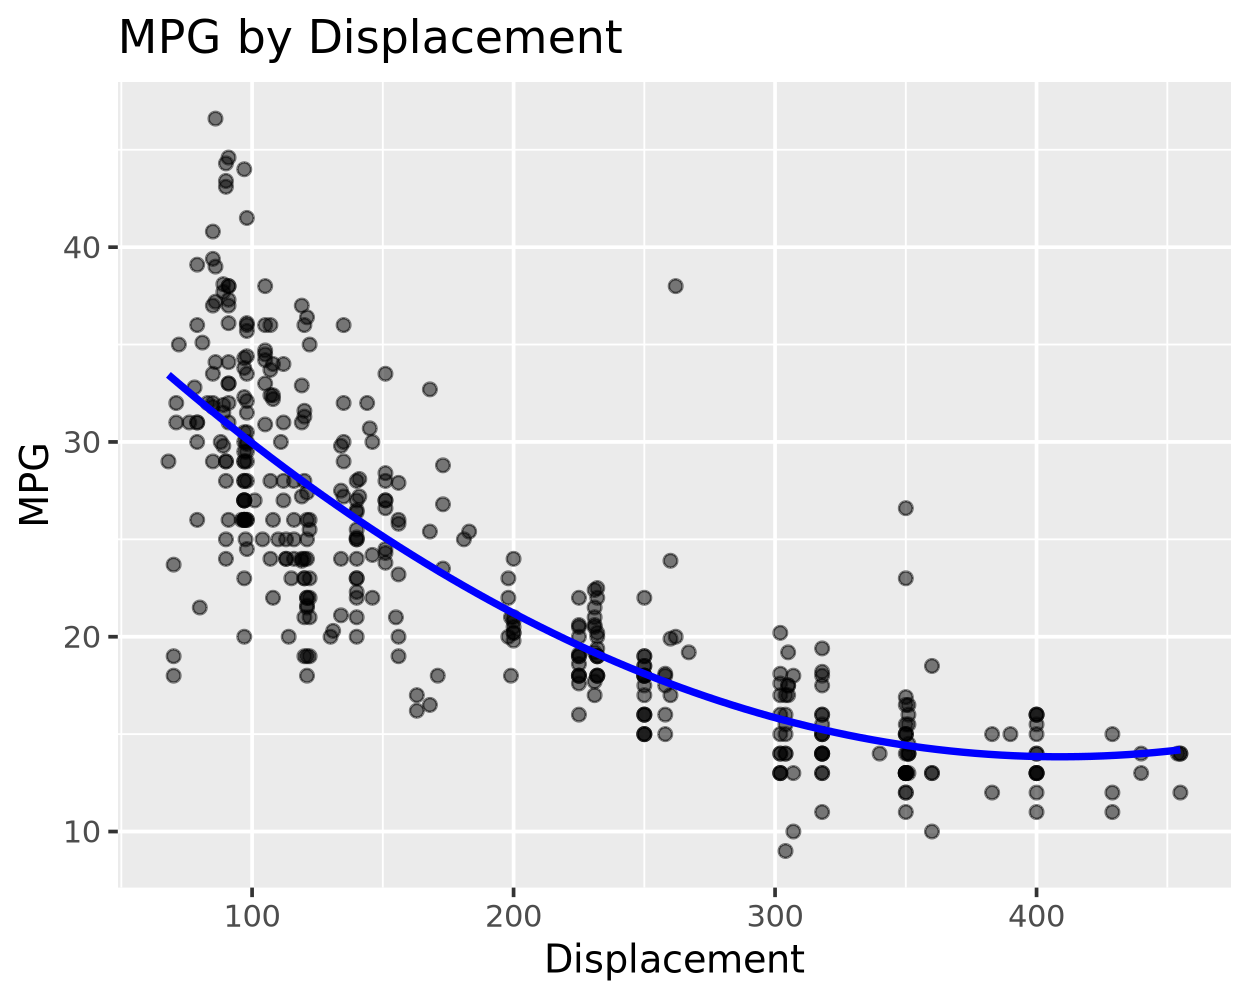

In [3]:
p = ggplot(Auto, aes(x=displacement, y=mpg)) + geom_point(alpha=0.5) +
    geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "blue", linewidth = 1) +
    labs(title='MPG by Displacement', x='Displacement', y='MPG')

p

❓Does the relationship of `mpg` to `displacement` look linear?

The relationship between mpg and displacement does not appear to be linear. Instead, it appears more polynomial, with mpg decreasing more steeply at first as displacement increases, then leveling off at around 300 units of displacement.

Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [4]:
rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
             step_poly(displacement, degree = 2) |>
             step_mutate(cyl_cat = factor(cylinders)) |>
             step_dummy(cyl_cat) |>
             step_rm(cylinders)
             
rec_prepped = prep(rec, Auto)

rec_prepped |> juice() |> head()

mpg,displacement_poly_1,displacement_poly_2,cyl_cat_X4,cyl_cat_X5,cyl_cat_X6,cyl_cat_X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,0.05441134,-0.03507716,0,0,0,1
15,0.07519231,0.01040418,0,0,0,1
18,0.05972740,-0.02535046,0,0,0,1
16,0.05296150,-0.03750222,0,0,0,1
17,0.05199495,-0.03906473,0,0,0,1
15,0.11337129,0.14620717,0,0,0,1


In [5]:
mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(mpg ~ ., juice(rec_prepped))

mod_fit |> tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),9.80400,2.347784,4.175852,3.674900e-05
displacement_poly_1,-139.62890,14.546685,-9.598675,1.057522e-19
displacement_poly_2,36.12877,5.729022,6.306271,7.847591e-10
cyl_cat_X4,13.19295,2.165710,6.091745,2.709108e-09
cyl_cat_X5,15.03771,3.309007,4.544477,7.382794e-06
cyl_cat_X6,13.95151,2.592455,5.381581,1.285569e-07
cyl_cat_X8,14.74899,2.953773,4.993272,9.016402e-07


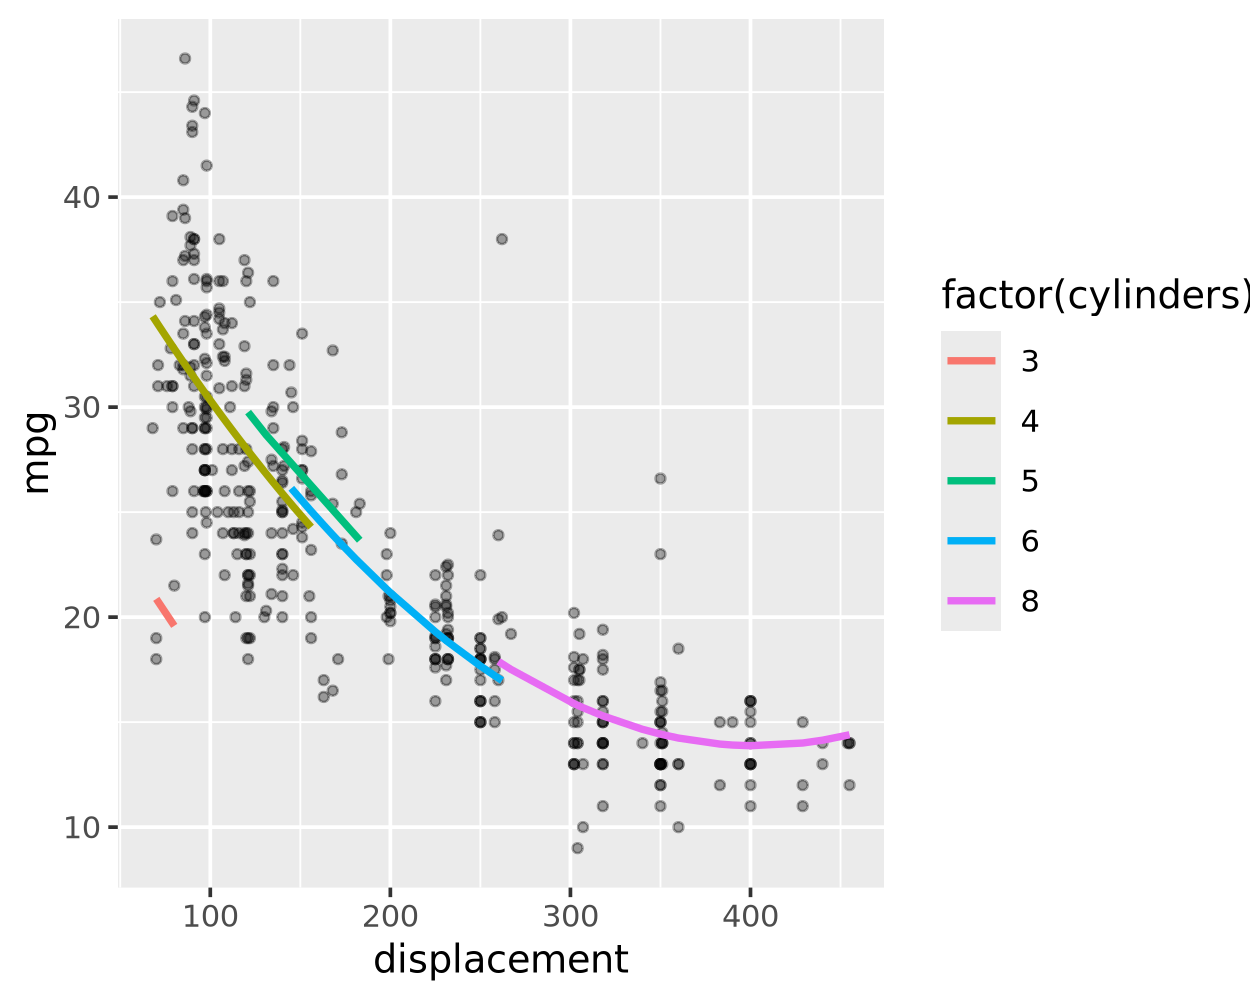

In [6]:
predict(mod_fit, rec_prepped |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)